<b> Name: Aishwarya Bhavsar</b><br>
<b> CSULB ID: 029371509 </b><br>
<b>CECS 551</b><br>
<b>Assignment 8</b><br>
<b>Develop face recognition software using pre-trained YOLO V3 and Facenet model.<br> Please
note that you don’t need to implement and train a model.</b><br>

<b><font color='purple'>(g) (10 points) For different τ ’s, compute the precision and recall.<br> The range of τ
should be wide enough and the interval of τ should be small enough to verify the
effect of τ .<br><br>
<font color='purple'>
• Precision = # of correctly recognized images/# of recognized images<br>
<font color='purple'>
• Recall = # of correctly recognized images/# of actual images of the celebrity. <br><br>
(h) (10 points) Repeat the step (f) and (g) for input images of 10 randomly selected unique celebrities. Draw the overlapped precision and recall curve as shown in Figure 1.<br>
(i) Submit your source code, requirements.txt and a report file. The report file should
include the experimental results, discussions, and the references of the pre-trained
models.

**Performance Of Object Detection Model** <br>

For object detection we use the concept of Intersection over Union (IoU). IoU computes intersection over the union of the two bounding boxes; the bounding box for the ground truth and the predicted bounding box

In [ ]:
!pip3 install hub==2.0.4 && torch==1.8.1

     |████████████████████████████████| 127 kB 5.1 MB/s 
     |████████████████████████████████| 132 kB 42.6 MB/s 
     |████████████████████████████████| 3.0 MB 60.4 MB/s 
     |████████████████████████████████| 81 kB 8.0 MB/s 
     |████████████████████████████████| 46 kB 3.2 MB/s 
     |████████████████████████████████| 79 kB 7.5 MB/s 
     |████████████████████████████████| 8.7 MB 48.7 MB/s 
     |████████████████████████████████| 138 kB 56.1 MB/s 
     |████████████████████████████████| 43 kB 1.6 MB/s 
     |████████████████████████████████| 359 kB 40.8 MB/s 
     |████████████████████████████████| 62 kB 1.0 MB/s 
     |████████████████████████████████| 59 kB 6.1 MB/s 
     |████████████████████████████████| 90 kB 6.9 MB/s 
     |████████████████████████████████| 91 kB 9.3 MB/s 
     |████████████████████████████████| 47 kB 3.9 MB/s 
     |████████████████████████████████| 65 kB 3.1 MB/s 
     |████████████████████████████████| 127 kB 37.5 MB/s 
  Attempting uninstall: urllib3
   

In [ ]:
import numpy as np
import hub
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torch
from torchsummary import summary
import torchvision.models as models
import glob
from tqdm import tqdm
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

NumExpr defaulting to 2 threads.


In [ ]:
print(hub.__version__)

2.0.4


In [ ]:
print(torch.__version__)

1.10.0+cu111


In [ ]:
import glob
data_dir = '/content/drive/MyDrive/Selected_Dataset'

list_imgs = glob.glob(data_dir + "/**/*.jpg")
print(f"There are {len(list_imgs)} images in the dataset {data_dir}")

There are 1200 images in the dataset /content/drive/MyDrive/Selected_Dataset


In [ ]:
# create dataloader with required transforms 
tc = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.ToTensor()              
    ])

In [ ]:
image_datasets = datasets.ImageFolder(data_dir, transform=tc)
dloader = torch.utils.data.DataLoader(image_datasets, batch_size=10, shuffle=False)

In [ ]:
print(len(image_datasets))

1200


torch.Size([256, 256, 3])
tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0039, 0.0039],
         [0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0039, 0.0039],
         [0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0039, 0.0039],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.2353, 0.1804, 0.1529],
         [0.0000, 0.0000, 0.0000,  ..., 0.2824, 0.2275, 0.1882],
         [0.0000, 0.0000, 0.0000,  ..., 0.2824, 0.2275, 0.1882]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0039, 0.0039],
         [0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0039, 0.0039],
         [0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0039, 0.0039],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.1608, 0.1137, 0.0863],
         [0.0000, 0.0000, 0.0000,  ..., 0.2039, 0.1608, 0.1216],
         [0.0000, 0.0000, 0.0000,  ..., 0.2078, 0.1608, 0.1216]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0039, 0.0039],
         [0.0000, 0.0000, 0.0000,  ..., 0.0039, 0.0039, 0.0039],
         [0.0000, 0.0000, 0.0000

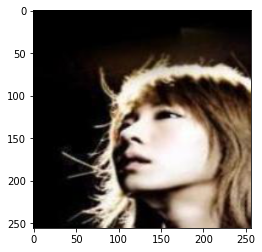

In [ ]:
for img, label in dloader:
  print(np.transpose(img[0], (1,2,0)).shape)
  print(img[0])
  plt.imshow((img[0].detach().numpy().transpose(1, 2, 0)*255).astype(np.uint8))
  plt.show()
  break

In [ ]:
def copy_embeddings(m, i, o):
    """Copy embeddings from the penultimate layer.
    """
    o = o[:, :, 0, 0].detach().numpy().tolist()
    outputs.append(o)

In [ ]:
# fetch pretrained model
model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=True)

Downloading: "https://github.com/pytorch/vision/archive/v0.10.0.zip" to /root/.cache/torch/hub/v0.10.0.zip
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [ ]:
# Select the desired layer
layer = model._modules.get('avgpool')
# attach hook to the penulimate layer
_ = layer.register_forward_hook(copy_embeddings)

In [ ]:
outputs = []  # list of embeddings
model.eval() # Inference mode

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
# Generate image's embeddings for all images in dloader and saves 
# them in the list outputs
for X, y in dloader:
    _ = model(X)

In [ ]:
len(outputs)

120

In [ ]:
# flatten list of embeddings to remove batches
list_embeddings = [item for sublist in outputs for item in sublist]
print(len(list_embeddings))

1200


In [ ]:
assert len(list_embeddings) == len(image_datasets)

In [ ]:
np.array(list_embeddings[0]).shape

(512,)

In [ ]:
len(image_datasets)

1200

<b><font color='red'>Print 10 embeddings of randomly selected unique celebrities.

In [ ]:
print(outputs[0:9])

[[[1.0494840145111084, 0.6327646970748901, 0.2011743038892746, 1.1638250350952148, 0.6332703232765198, 0.8214037418365479, 0.8691402673721313, 1.550246238708496, 0.1799108386039734, 1.4215855598449707, 0.21836519241333008, 0.5425021052360535, 0.020819468423724174, 0.4297272562980652, 0.11338071525096893, 0.8681647181510925, 0.10835275053977966, 1.376829981803894, 0.16498464345932007, 1.8382054567337036, 1.056017279624939, 2.8908708095550537, 1.3998883962631226, 0.23012641072273254, 0.5983468294143677, 0.38922733068466187, 0.16918915510177612, 1.8237642049789429, 1.7735164165496826, 0.22906415164470673, 0.6229870319366455, 1.8890633583068848, 0.544605016708374, 1.698947548866272, 0.11501239240169525, 0.48368072509765625, 0.08279095590114594, 0.139384463429451, 0.2099328190088272, 0.12207639217376709, 0.46822959184646606, 0.584237813949585, 0.5868879556655884, 1.2146669626235962, 0.699407160282135, 0.6387356519699097, 0.7951008081436157, 0.7783321738243103, 1.0446209907531738, 1.43022489

In [ ]:
from scipy.spatial import distance

In [ ]:
# using for loop
a = list_embeddings
  
# printing the list using loop
for x in range(len(a)):
  result = distance.euclidean(a[x],a[x-1])
  print(result)

15.255477973140366
13.308284858550515
10.944386163754464
11.9162972071459
12.242808540214265
14.519597915340547
15.064556109993775
10.491491781976704
11.902779072662932
11.381331722599525
15.50803935474357
13.180986546993502
15.013013015970973
14.770182753502827
11.030871686454432
12.715869067136753
12.072002500922158
12.023612720033855
13.211951578151332
14.46822072317722
13.80290835659984
13.868134450867334
12.858201763923361
11.90582318692057
13.225719223805225
10.054865835761722
11.964737408668467
14.474948905693113
15.632608767275238
13.54669530943164
12.508161709446329
12.575655317552004
13.664966535842686
8.824185706527995
9.362913269049868
8.034397464552773
10.293106520231104
10.494673782782172
10.943744906832798
11.53313848688373
8.916915624779135
7.914181750335219
8.180489866159467
8.571784002044494
13.822769731354148
12.727766693019914
9.673405881260798
9.091575334742954
11.944780807734078
11.883671035722083
16.137788875139425
17.68257308335085
8.815951298321766
8.3607661566

<b><font color='red'>Parameter τ (tau)<b>

In [ ]:
def a_simple_classifier(res, τ = 13):
    predicted = np.zeros(len(res))
    for i in range(len(res)):
        if res[i] < τ:
            predicted[i] = 1 
    return predicted

<b><font color = 'red'>For Calculating True Positives And True Negatives

<b><font color='red'>Precision <font color='black'>is the ability of a model to identify only relevant objects.<br> It is the percentage
of correct positive predictions.<br><br><font color='red'> Recall <font color='black'>is the ability of a model to find all relevant cases (all
ground-truth bounding boxes).<br> It is the percentage of correct positive predictions among all
given ground truths. <br>To calculate the precision and recall values, each detected bounding
box must first be classified as:<br><br>
<font color='blue'>• True positive (TP): <font color='black'>A correct detection of a ground-truth bounding box;<br>
<font color='blue'>• False positive (FP): <font color='black'>An incorrect detection of a non-existing object or a misplaced
detection of an existing object;<br>
<font color='blue'>• False negative (FN): <font color='black'>An undetected ground-truth bounding box.<br>

In [ ]:
def calculate_metrics(predicted, actual):
    TP, FP, TN, FN = 0, 0, 0, 0
    for i in range(len(predicted)):
        if   (predicted[i] == 0) & (actual[i] == 0):
            TP += 1
        elif (predicted[i] == 0) & (actual[i] == 1):
            FP += 1
        elif (predicted[i] == 1) & (actual[i] == 1):
            TN += 1
        else:
            FN += 1

    accuracy  = (TP + TN) / (TP + FP + TN + FN) 
    precision = (TP) / (TP + FP) 
    recall    = (TP) / (TP + FN) 
    f1_score  = (2 * precision * recall) / (precision + recall)
    
    return accuracy, precision, recall, f1_score

<b>Apply the classifier defined above for different threshold values. <br> Defined 10 different threshold values using np.linspace and an array for each metric.<br> Then, we loop through each threshold value, get a prediction from our classifier, get each metric, and print a column for each result.

In [ ]:
τ = np.linspace(7,22,20) 
accuracy = np.zeros(len(τ))
precision = np.zeros(len(τ))
recall = np.zeros(len(τ))
f1_score = np.zeros(len(τ))

In [ ]:
print('Threshold \t Accuracy \t Precision\t Recall \t  F1 Score ')
for i in range(len(τ)):
    prediction = a_simple_classifier(res, τ[i])
    accuracy[i], precision[i], recall[i], f1_score[i]=calculate_metrics(prediction, y)
    print(f'{τ[i]: .2f}\t\t {accuracy[i]: .2f}\t\t {precision[i]: .2f}\t\t {recall[i]: .2f}\t\t {f1_score[i]: .2f}')